In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

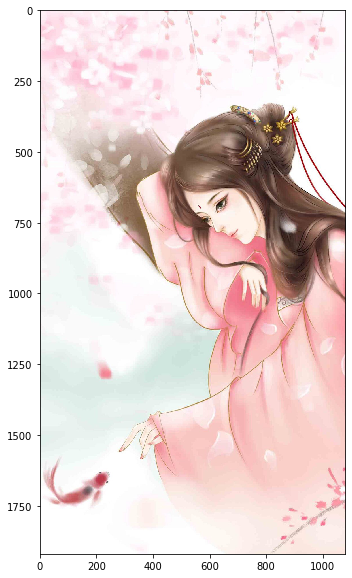

In [2]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img)
plt.show()

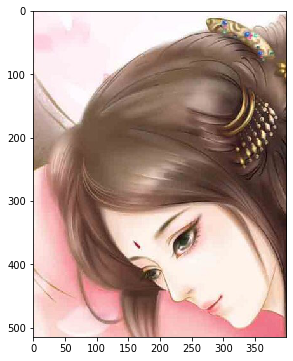

In [7]:
face = img[325:840, 400:800]

fig, ax = plt.subplots(figsize=[6, 6])
ax.imshow(face)
plt.show()

#### 模板匹配（单目标一次匹配：目标只在图像中出现一次）

#### cv2.matchTemplate(image, templ, method[, result[, mask]])

该函数做的事情是：类似于卷积操作，使用模板在对应的输入图像上滑动，并与输入图像对应的子区域进行比较，返回的是一个灰度图像，灰度图像上每一个像素值代表了此区域与模板的匹配程度，如果输入图像的大小为[W, H],模板的大小为[w, h]，那么返回的灰度图像大小为[W-w+1, H-h+1]。

+ image:
+ templ:模板图像
+ method:
    + cv2.TM_CCOEFF
    + cv2.TM_CCOEFF_NORMED
    + cv2.TM_CCORR
    + cv2.TM_CCORR_NORMED
    + cv2.TM_SQDIFF
    + cv2.TM_SQDIFF_NORMED

不同的method对结果的解释不同，如果使用的是cv2.TM_SQDIFF_x方法，那么cv2.matchTemplate()返回值中的最小值表示为寻找到的最匹配结果，其余的方法则是返回值中的最大值表示最匹配结果


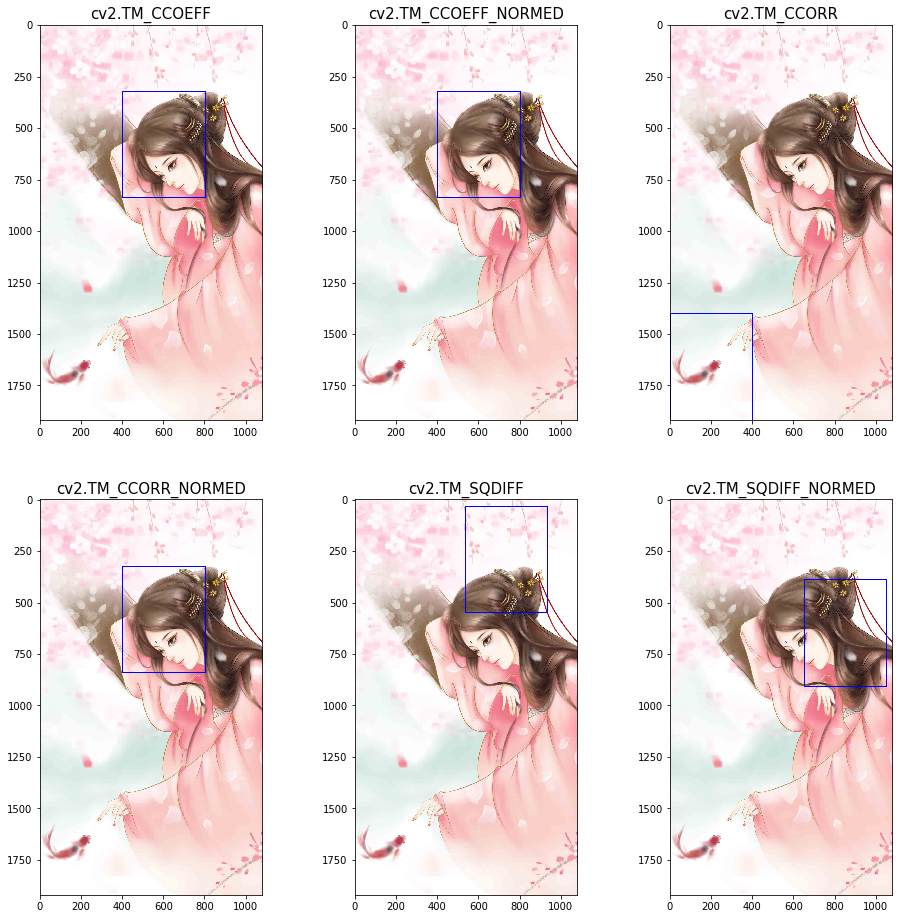

In [12]:
tm_methods = ['cv2.TM_CCOEFF', 
              'cv2.TM_CCOEFF_NORMED', 
              'cv2.TM_CCORR', 
              'cv2.TM_CCORR_NORMED', 
              'cv2.TM_SQDIFF', 
              'cv2.TM_SQDIFF_NORMED']

face_h, face_w = face.shape[:2]
fig, axes = plt.subplots(2, 3, figsize=[16, 16])
for method, ax in zip(tm_methods, axes.flatten()):
    img_copy = img.copy()
    img_tm = cv2.matchTemplate(img_copy, templ=face, method=eval(method))
    res = cv2.minMaxLoc(img_tm)
    min_val, max_val, (min_xmin, min_ymin), (max_xmin, max_ymin) = res
    
    # 不同的method对结果的解释不同，
    # 如果使用的是cv2.TM_SQDIFF_x方法，那么cv2.matchTemplate()返回值中的最小值表示为寻找到的最匹配结果，
    # 其余的方法则是返回值中的最大值表示最匹配结果
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = (min_xmin, min_ymin)  # [xmin, ymin]
    else:
        top_left = (max_xmin, max_ymin)  # [xmin, ymin]
    
    bottom_right = (top_left[0] + face_w, top_left[1] + face_h)  # [xmax, ymax]
    cv2.rectangle(img_copy, pt1=top_left, pt2=bottom_right, color=[0, 0, 255], thickness=3)
    ax.imshow(img_copy)
    ax.set_title(method, fontsize=15)
plt.show()

<div class="alert alert-block alert-success"> 
<b>将cv2.matchTemplate()返回的灰度图像输入cv2.minMaxLoc()函数，得到的返回结果是其中最匹配的的区域（只返回一个区域），对于模板在输入图像上多次出现时cv2.minMaxLoc()函数不再适用，此时可以使用阈值的方法对cv2.matchTemplate()返回的灰度图像进行过滤， 提取满足一定匹配程度的区域。</b>!
</div>

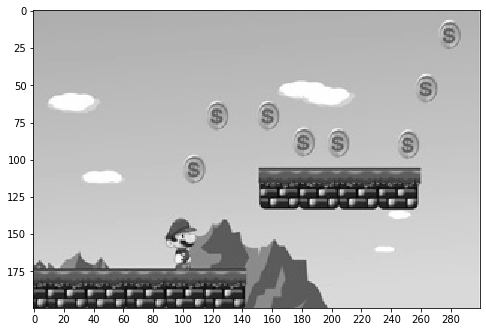

In [61]:
img = cv2.imread('./maliao.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_gray, cmap='gray')
ax.set_xticks(range(0, img.shape[1], 20))
plt.show()

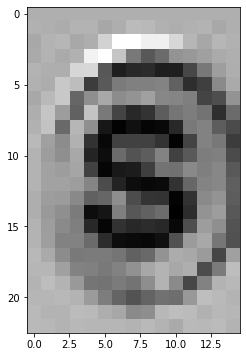

In [62]:
coin = img_gray[95:118, 100:115]
coin_h, coin_w = coin.shape[:2]

fig, ax = plt.subplots(figsize=[6, 6])
ax.imshow(coin, cmap='gray')
plt.show()

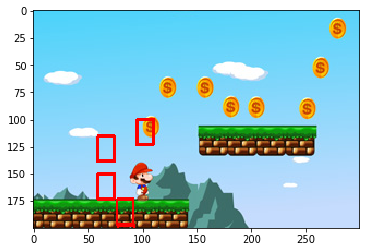

In [64]:
img_tm = cv2.matchTemplate(img_gray.copy(), templ=coin, method=cv2.TM_CCORR_NORMED)
thresh = 0.6
match_locs = np.where(res >= thresh)

for pt in zip(*match_locs):
    cv2.rectangle(img_rgb, pt, (pt[0]+coin_w, pt[1]+coin_h), [255, 0, 0], 1)

fig, ax = plt.subplots()
ax.imshow(img_rgb)
plt.show()